**Objective:**

Demonstrate various dimensionality reduction techniques

**Dataset:** 

Titanic Survivor Dataset

Titanic Survivor Dataset contains tabular data with name, gender and other info of the survivors of the Titanic.

**Dimensionality Reduction Techniques:**

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP

In [1]:
! pip install umap-learn

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 11.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=4c385d76508b09768ac99d0c95c33f8e9dc383229ea13f71f5b4deb95f43ea74
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=642afaf1c887acdfd9c711b2f632603bb6a0328e5912a77ce8b3386a96317377
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:
! pip install ipython-autotime

In [3]:
# load time of execution for each block
%load_ext autotime

time: 125 µs (started: 2021-11-10 06:11:22 +00:00)


In [4]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as LA
from scipy import optimize

import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from matplotlib import pyplot as plt
import imageio
import tqdm

import seaborn as sns
%matplotlib inline

time: 24.8 s (started: 2021-11-10 06:11:27 +00:00)


In [5]:
#url = 'https://pkgstore.datahub.io/core/s-and-p-500-companies-financials/constituents-financials/archive/8e571d9a5791c6355cd5ef8455d56920/constituents-financials.csv'
url = 'https://raw.githubusercontent.com/prajaktajoshi2390/data-cleaning-and-preprocessing/main/dataset/titanic-survivor-datasets.csv'
df = pd.read_csv(url)

time: 257 ms (started: 2021-11-10 06:11:55 +00:00)


In [6]:
!pip install category_encoders

import category_encoders as cat_encoder

columns_encoded = ['Sex', 'Embarked']
one_hot_enc = cat_encoder.OneHotEncoder(cols=columns_encoded)
df = one_hot_enc.fit_transform(df)
df.head()

     |████████████████████████████████| 82 kB 349 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex_1,Sex_2,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_1,Embarked_2,Embarked_3,Embarked_4
0,1,0,3,"Braund, Mr. Owen Harris",1,0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,35.0,1,0,113803,53.1000,C123,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,35.0,0,0,373450,8.0500,NaN,1,0,0,0


time: 3.92 s (started: 2021-11-10 06:11:57 +00:00)


In [7]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex_1',
 'Sex_2',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3',
 'Embarked_4']

time: 6.9 ms (started: 2021-11-10 06:12:05 +00:00)


In [8]:

df = df.dropna(how='any')

y = df['Survived']
metricList = ['Pclass', 'Sex_1', 'Age', 'Fare', 'Embarked_1', 'Embarked_2', 'SibSp', 'Parch']
X = df[metricList]

time: 14.2 ms (started: 2021-11-10 06:12:07 +00:00)


In [9]:
X_PCA = PCA(n_components=5).fit_transform(X)

time: 32.6 ms (started: 2021-11-10 06:12:12 +00:00)


In [10]:
X_SVD = TruncatedSVD(n_components = 5).fit_transform(X)

time: 14 ms (started: 2021-11-10 06:12:14 +00:00)


In [11]:
X_TSNE = TSNE().fit_transform(X)

time: 942 ms (started: 2021-11-10 06:12:15 +00:00)


In [12]:
X_UMAP = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


time: 11 s (started: 2021-11-10 06:12:17 +00:00)


In [13]:
X_LLE = LocallyLinearEmbedding(n_components=5).fit_transform(X)

time: 63.5 ms (started: 2021-11-10 06:12:31 +00:00)


In [14]:
X_ISO = Isomap(n_components=20).fit_transform(X)

time: 55.8 ms (started: 2021-11-10 06:12:32 +00:00)


**PCA Visualization**

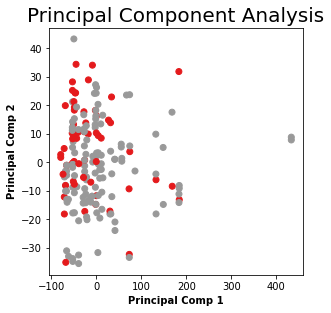

time: 278 ms (started: 2021-11-10 06:12:39 +00:00)


In [15]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='Set1')
plt.title("Principal Component Analysis", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**SVD Visualization**

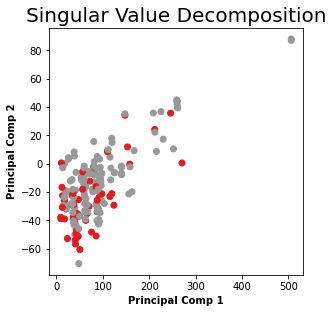

time: 212 ms (started: 2021-11-10 06:12:47 +00:00)


In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(X_SVD[:,0], X_SVD[:,1], c=y, cmap='Set1')
plt.title("Singular Value Decomposition", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**UMAP Visualization**

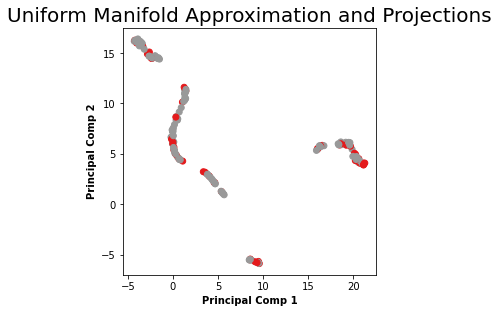

time: 216 ms (started: 2021-11-10 06:12:53 +00:00)


In [17]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title("Uniform Manifold Approximation and Projections", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

**TSNE Visualization**

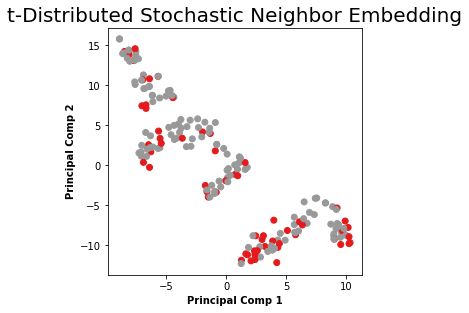

time: 210 ms (started: 2021-11-10 06:12:58 +00:00)


In [18]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='Set1')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**LLE Visualization**

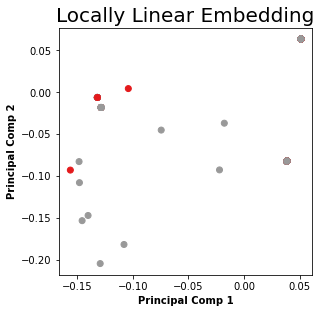

time: 188 ms (started: 2021-11-10 06:13:04 +00:00)


In [19]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_LLE[:,0], X_LLE[:,1], c=y, cmap='Set1')
plt.title("Locally Linear Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**ISOMAP Visualization**

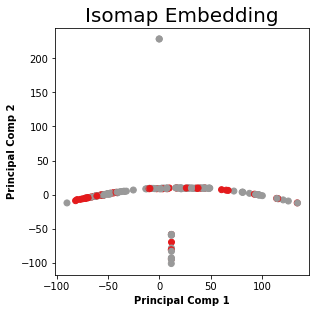

time: 191 ms (started: 2021-11-10 06:13:10 +00:00)


In [20]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X_ISO[:,0], X_ISO[:,1], c=y, cmap='Set1')
plt.title("Isomap Embedding", fontsize=20)
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

**Model prediction before dimensionality reduction**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

time: 26.7 ms (started: 2021-11-10 06:13:16 +00:00)


In [22]:
#X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 5.04 ms (started: 2021-11-10 06:13:18 +00:00)


In [23]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.5357142857142857
time: 58.4 ms (started: 2021-11-10 06:13:19 +00:00)


**Model prediction after dimensionality reduction**

In [24]:
pca_dims = PCA()
pca_dims.fit(X_train)
pca_cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
pca_d = np.argmax(pca_cumsum >= 0.95) + 1
pca_d

1

time: 16.7 ms (started: 2021-11-10 06:13:25 +00:00)


In [26]:
pca = PCA(n_components=pca_d)
pca_X_reduced = pca.fit_transform(X_train)

svd = TruncatedSVD(n_components=5)
svd_X_reduced = svd.fit_transform(X_train)

umap_X_reduced = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='correlation').fit(X_train)

time: 4.08 s (started: 2021-11-10 06:13:39 +00:00)


In [27]:
pca_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
pca_clf_reduced.fit(pca_X_reduced, y_train)
pca_X_test_reduced = pca.transform(X_test)
pca_y_hat_reduced = pca_clf_reduced.predict(pca_X_test_reduced)
print("pca accuracy: " + str(accuracy_score(y_test, pca_y_hat_reduced)))


svd_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
svd_clf_reduced.fit(svd_X_reduced, y_train)
svd_X_test_reduced = svd.transform(X_test)
svd_y_hat_reduced = svd_clf_reduced.predict(svd_X_test_reduced)
print("svd accuracy: " + str(accuracy_score(y_test, svd_y_hat_reduced)))


umap_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
umap_clf_reduced.fit(umap_X_reduced.embedding_, y_train)
print("umap accuracy: ")
umap_clf_reduced.score(umap_X_reduced.transform(X_test), y_test)





/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pca accuracy: 0.5892857142857143
svd accuracy: 0.6785714285714286
umap accuracy: 


0.5892857142857143

time: 7.77 s (started: 2021-11-10 06:13:51 +00:00)


In [28]:
!pip install umap
import umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=84dbd04b01e930d136fecf329b4252d20cfa9a6f4b9bb479f6a6980a05a6dbd5
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


time: 4.78 s (started: 2021-11-10 06:14:01 +00:00)


In [29]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=pca_d)
lle_X_reduced = lle.fit_transform(X_train)

lle_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
lle_clf_reduced.fit(lle_X_reduced, y_train)
lle_X_test_reduced = lle.transform(X_test)
lle_y_hat_reduced = lle_clf_reduced.predict(lle_X_test_reduced)
print("lle accuracy: " + str(accuracy_score(y_test, lle_y_hat_reduced)))

lle accuracy: 0.5892857142857143
time: 175 ms (started: 2021-11-10 06:14:12 +00:00)


In [30]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=pca_d)
iso_X_reduced = iso.fit_transform(X_train)

iso_clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
iso_clf_reduced.fit(iso_X_reduced, y_train)
iso_X_test_reduced = iso.transform(X_test)
iso_y_hat_reduced = iso_clf_reduced.predict(iso_X_test_reduced)
print("iso accuracy: " + str(accuracy_score(y_test, iso_y_hat_reduced)))

iso accuracy: 0.5892857142857143
time: 75.8 ms (started: 2021-11-10 06:14:14 +00:00)


**Analysis:**

Here we implemented various dimensionality techniques on the tabular dataset. We observed the performance of different techniques as follows:

**Algorithm on Tabular Dataset - Accuracy**

PCA	0.58

SVD	0.68

LLE	0.59

ISOMAP	0.59

UMAP	0.58

**Algorithm on Tabular Dataset - Execution Time** 

PCA	32.6ms

SVD	14ms

LLE	63.5ms

t-SNE	942ms

ISOMAP	55.8ms

UMAP	11s